In [25]:
import time
import sklearn.preprocessing, sklearn.feature_selection, sklearn.model_selection, sklearn.tree, sklearn.metrics, sklearn.ensemble, sklearn.linear_model, sklearn.neighbors, sklearn.svm, sklearn.naive_bayes, sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import git  
import xgboost as xgb
import pickle
from IPython.display import display

In [5]:
repo = git.Repo('.', search_parent_directories=True)

train = pd.read_csv(repo.working_tree_dir + '/dataset/UNSW_NB15_training-set.csv')
test = pd.read_csv(repo.working_tree_dir + '/dataset/UNSW_NB15_testing-set.csv')

In [6]:
print("Jumlah data training : ", len(train))
print("Jumlah data training : ", len(test))

Jumlah data training :  175341
Jumlah data training :  82332


In [7]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [8]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [9]:
# Digabung dan nanti akan dipisah dengan split train test untuk hasil yang lebih maksimal
data = pd.concat([train, test]).reset_index(drop=True)

In [10]:
# Check categorical data and change "-" value to "None"
cols_cat = data.select_dtypes('object').columns
for col in cols_cat:
    data[col] = np.where(data[col] == '-', None, data[col])

DATA PREPROCESSING

In [11]:
data.isna().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [12]:
data.duplicated().sum()

0

In [13]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,None,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,None,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,None,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,None,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,None,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,None,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,None,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,None,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [14]:
data = data.drop(columns=['id', 'attack_cat','service']) # remove uncorrelated feature
cols_cat = cols_cat.drop('attack_cat')
cols_cat = cols_cat.drop('service')
data.head()

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,tcp,FIN,6,4,258,172,74.087490,252,254,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,tcp,FIN,14,38,734,42014,78.473372,62,252,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,tcp,FIN,8,16,364,13186,14.170161,62,252,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,tcp,FIN,12,12,628,770,13.677108,62,252,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,tcp,FIN,10,6,534,268,33.373826,254,252,...,2,1,40,0,0,0,2,39,0,0


In [15]:
label = data['label'].value_counts()
label

label
1    164673
0     93000
Name: count, dtype: int64

ONE HOT ENCODING

In [16]:
cat_data = data[cols_cat]

encoder = sklearn.preprocessing.OneHotEncoder()

encoded_data = encoder.fit_transform(cat_data)

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cols_cat))

data = pd.concat([data.drop(cols_cat, axis=1), encoded_df], axis=1)

data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalization

In [17]:
cols_numeric = data._get_numeric_data().columns
cols_numeric = list(cols_numeric)

scaler = sklearn.preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(data[cols_numeric])

scaled_data = pd.DataFrame(scaled, columns=cols_numeric)
normalized_data = pd.concat([data.drop(cols_numeric, axis=1), scaled_data, ], axis=1)

data = normalized_data

data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.002025,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010832,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.027052,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.028027,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.007491,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
x = data.drop('label', axis=1)
y = data['label']

kbest = sklearn.feature_selection.SelectKBest(score_func=sklearn.feature_selection.f_classif, k=34)
kbest.fit(x, y)

X_kbest = kbest.transform(x)

kbest_indices = kbest.get_support(indices=True)

print(kbest_indices)

selected_features = x.columns[kbest_indices]
selected_data = data[selected_features]

data = pd.concat([selected_data, y], axis=1)

data.head()

[  2   4   5   6   8   9  11  12  15  16  17  18  19  21  24  27  28  29
  30  31  32  36  37  38  45 117 136 152 158 159 174 176 177 179]


,dpkts,dbytes,rate,sttl,sload,dload,dloss,sinpkt,djit,swin,...,proto_ospf,proto_sctp,proto_tcp,proto_udp,proto_unas,state_CON,state_FIN,state_INT,state_REQ,label
0,0.000363,0.000012,0.000074,0.988235,2.364553e-06,0.000379,0.000000,0.000288,0.000026,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.003449,0.002866,0.000078,0.243137,1.401989e-06,0.022458,0.003087,0.000592,0.002996,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.001452,0.000900,0.000014,0.243137,2.625704e-07,0.002717,0.001090,0.002748,0.024657,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.001089,0.000053,0.000014,0.243137,4.576117e-07,0.000150,0.000545,0.001812,0.010777,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000545,0.000018,0.000033,0.996078,1.429776e-06,0.000178,0.000182,0.000566,0.000250,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Model Training

In [19]:
x = data.drop(columns=['label'])
x = np.array(x)
y = data['label']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.6)
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 103069
Testing set: 154604


In [20]:
models = {}


knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=13)
dt = sklearn.tree.DecisionTreeClassifier()
lr = sklearn.linear_model.LogisticRegression()
nb = sklearn.naive_bayes.GaussianNB() 

models['Bagged KNN'] = sklearn.ensemble.BaggingClassifier(knn, n_estimators=500, random_state=26) # Bagging
models['Random Forest'] = sklearn.ensemble.RandomForestClassifier(random_state=26) # Bagging
models['AdaBoost'] = sklearn.ensemble.AdaBoostClassifier(random_state=26) # Boosting


In [74]:

train_scoreNum, test_scoreNum = sklearn.model_selection.validation_curve(
                               models['Random Forest'],
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = np.arange(10,500,10), cv = 3)

KeyboardInterrupt: 

In [ ]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
valid_mean = np.mean(test_scoreNum, axis=1)
valid_std = np.std(test_scoreNum, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(np.arange(10,500,10), train_mean, label="Training score", color="b")
plt.plot(np.arange(10,500,10), valid_mean, label="Cross-validation score", color="g")
plt.fill_between(
    np.arange(10,500,10),
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2,
    color="b"
)
plt.fill_between(
    np.arange(10,500,10),
    valid_mean - valid_std,
    valid_mean + valid_std,
    alpha=0.2,
    color="g"
)
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:

train_scoreNum, test_scoreNum = sklearn.model_selection.validation_curve(
                               models['AdaBoost'],
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = np.arange(10,500,10), cv = 3)

In [ ]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
valid_mean = np.mean(test_scoreNum, axis=1)
valid_std = np.std(test_scoreNum, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for AdaBoost")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(np.arange(10,500,10), train_mean, label="Training score", color="b")
plt.plot(np.arange(10,500,10), valid_mean, label="Cross-validation score", color="g")
plt.fill_between(
    np.arange(10,500,10),
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2,
    color="b"
)
plt.fill_between(
    np.arange(10,500,10),
    valid_mean - valid_std,
    valid_mean + valid_std,
    alpha=0.2,
    color="g"
)
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:

train_scoreNum, test_scoreNum = sklearn.model_selection.validation_curve(
                               models['Bagged KNN'],
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = np.arange(10,250,10), cv = 3)

In [ ]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
valid_mean = np.mean(test_scoreNum, axis=1)
valid_std = np.std(test_scoreNum, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Bagged KNN")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(np.arange(10,500,10), train_mean, label="Training score", color="b")
plt.plot(np.arange(10,500,10), valid_mean, label="Cross-validation score", color="g")
plt.fill_between(
    np.arange(10,500,10),
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2,
    color="b"
)
plt.fill_between(
    np.arange(10,500,10),
    valid_mean - valid_std,
    valid_mean + valid_std,
    alpha=0.2,
    color="g"
)
plt.legend(loc="best")
plt.grid()
plt.show()

In [21]:
models['Bagged KNN'] = sklearn.ensemble.BaggingClassifier(knn, n_estimators=10, random_state=52) # Bagging
models['Random Forest'] = sklearn.ensemble.RandomForestClassifier(n_estimators=10,  random_state=52) # Bagging
models['AdaBoost'] = sklearn.ensemble.AdaBoostClassifier(n_estimators=10,  random_state=52) # Boosting
models['XGBoost'] = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc") # Boosting

estimators = [
    ('knn', knn),
    ('dt', dt),
    ('nb', nb)
]

estimators_ensemble = [
    ('bknn', models['Bagged KNN']),
    ('rf', models['Random Forest']),
    ('ab', models['AdaBoost']),
    ('xgb', models['XGBoost'])
]

models['Stacking'] = sklearn.ensemble.StackingClassifier(estimators=estimators, final_estimator=lr) # Stacking
models['Multi Ensemble'] = sklearn.ensemble.StackingClassifier(estimators=estimators_ensemble, final_estimator=lr) # Stacking


train_score, accuracy, precision, recall, training_time, y_pred, pred_time, f1 = {}, {}, {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(x_train, y_train)
    training_time[key] = time.time() - start_time

    start_time = time.time()
    y_pred[key] = models[key].predict(x_test) 
    pred_time[key] = time.time() - start_time 

    train_score[key] = models[key].score(x_train, y_train) # train score
    accuracy[key] = models[key].score(x_test, y_test) # test score
    precision[key] = sklearn.metrics.precision_score(y_test, y_pred[key]) # true positive rate
    recall[key] = sklearn.metrics.recall_score(y_test, y_pred[key]) # true negative rate
    f1[key] = sklearn.metrics.f1_score(y_test,y_pred[key], average='binary', pos_label=1) # summary of precision and recall
    print(key, "done")

Bagged KNN done
Random Forest done
AdaBoost done
XGBoost done
Stacking done
Multi Ensemble done


In [22]:
res = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training Time', 'Predict Time', 'F1 Score'])
res['Training score'] = train_score.values()
res['Accuracy'] = accuracy.values()
res['Precision'] = precision.values()
res['Recall'] = recall.values()
res['Training Time'] = training_time.values()
res['Predict Time'] = pred_time.values()
res['F1 Score'] = f1.values()
res

,Training score,Accuracy,Precision,Recall,Training Time,Predict Time,F1 Score
Bagged KNN,0.926641,0.913320,0.923770,0.942055,0.246340,191.598993,0.932823
Random Forest,0.994053,0.934536,0.949423,0.948029,1.723325,0.219411,0.948725
AdaBoost,0.894808,0.894996,0.922989,0.911700,1.830291,0.277419,0.917310
XGBoost,0.951673,0.936483,0.951219,0.949254,5.162879,0.099241,0.950235
Stacking,0.972543,0.923275,0.930935,0.950408,15.452951,17.979764,0.940571
Multi Ensemble,0.969312,0.937977,0.948626,0.954610,139.591310,178.478656,0.951609


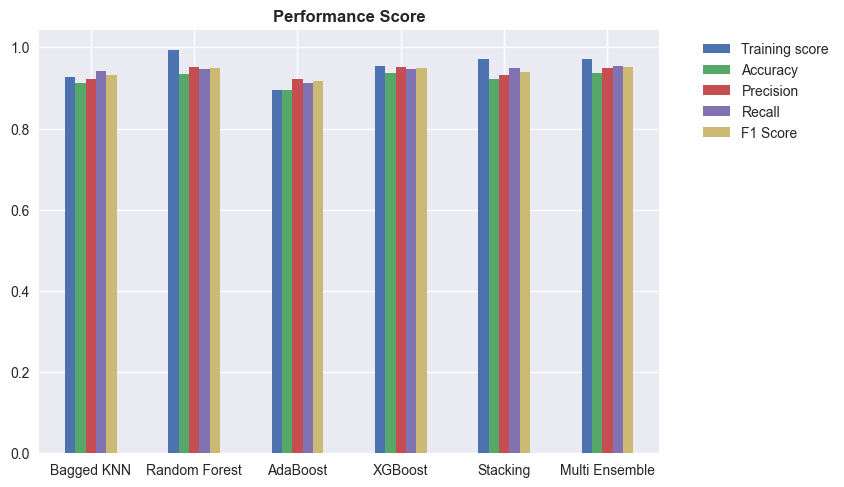

In [20]:
res_score = res.drop(columns=['Training Time', 'Predict Time'])
res_score.plot(kind='bar', stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation=0)
plt.title('Performance Score', fontdict={'fontweight': 'bold'})
plt.show()

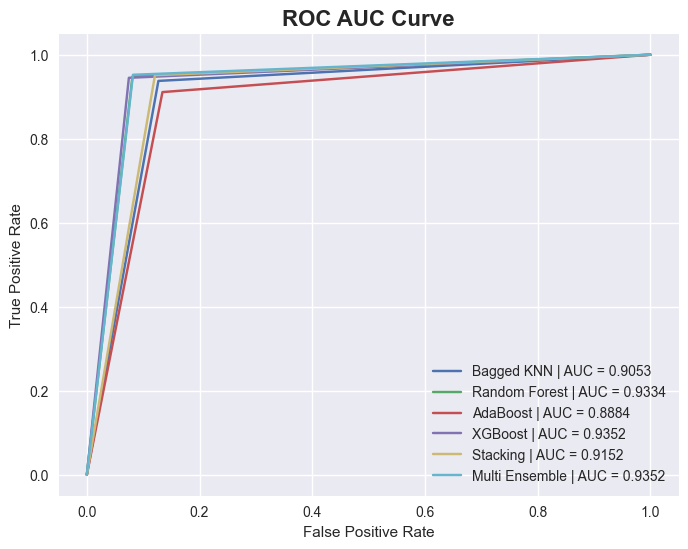

In [29]:
# ROC AUC CURVE
plt.figure(figsize=(8, 6))

for key in models.keys():
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_pred[key])
    auc = round(sklearn.metrics.roc_auc_score(y_test, y_pred[key]), 4)
    plt.plot(fpr, tpr, label= key + " | AUC = " + str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(label = 'ROC AUC Curve',fontsize=16, fontweight='bold' )
plt.legend()
plt.show()


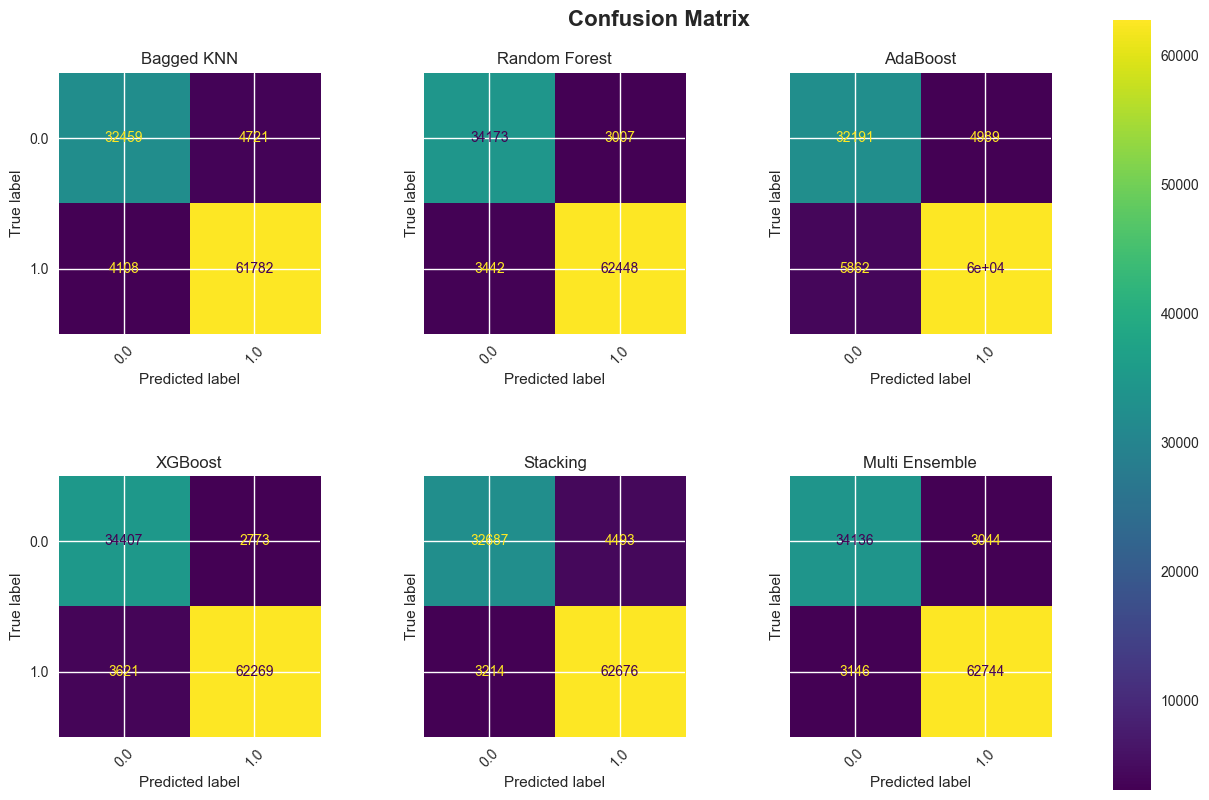

In [30]:
fp, fn = [], []
f, axes = plt.subplots(2, 3, figsize=(16, 10), sharey='row')
i = 0
for key in models.keys():
    row = i // 3
    col = i % 3
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred[key])
    display_cm = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[key].classes_)
    display_cm.plot(ax= axes[row, col], xticks_rotation=45)
    display_cm.ax_.set_title(key, fontdict={'fontsize': 12})
    display_cm.im_.colorbar.remove()
    i +=1

    #store FP and FN for comparison
    fp.append(cm[0][1]) # false positive
    fn.append(cm[1][0]) # false negative

plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(display_cm.im_, ax=axes)
plt.suptitle(t='Confusion Matrix', y=0.89, fontsize=16, fontweight='bold')
plt.show()

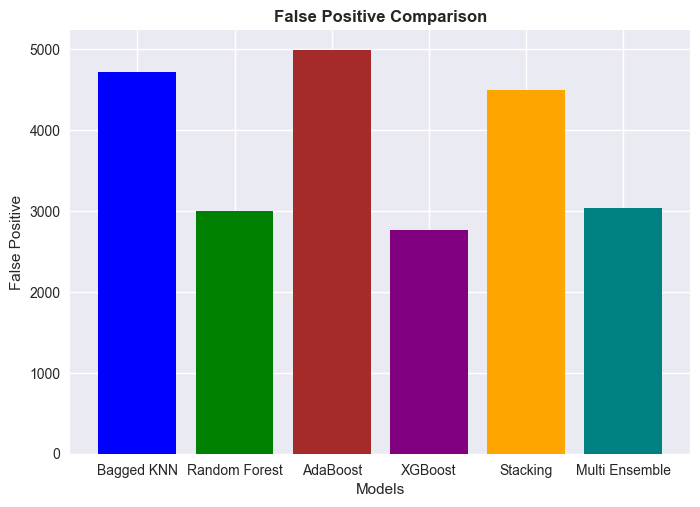

In [31]:
plt.bar(models.keys(), fp, color=['blue', 'green', 'brown','purple','orange', 'teal'])
plt.title('False Positive Comparison', fontdict={'fontweight': 'bold'})
plt.xlabel('Models')
plt.ylabel('False Positive')
plt.show()

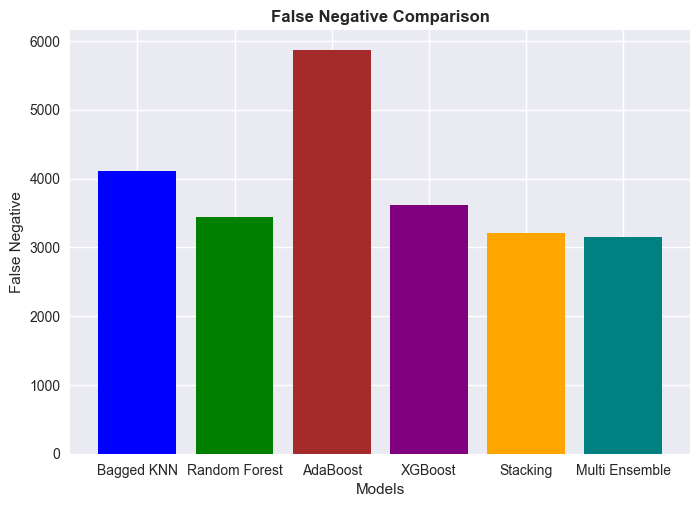

In [32]:
plt.bar(models.keys(), fn, color=['blue', 'green', 'brown','purple','orange', 'teal'])
plt.title('False Negative Comparison', fontdict={'fontweight': 'bold'})
plt.xlabel('Models')
plt.ylabel('False Negative')
plt.show()

In [33]:
y_pred, df = {}, {}
for key in models.keys():
    df[key] = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred[key]})
    print(key)
    display(df[key])

KeyError: 'Bagged KNN'

{}

In [34]:
res_64 = res
y_pred_64 = y_pred
y_test_64 = y_test
models_64 = models
%store res_64
%store y_pred_64
%store y_test_64
%store models_64

Stored 'res_64' (DataFrame)
Stored 'y_pred_64' (dict)
Stored 'y_test_64' (Series)
Stored 'models_64' (dict)


In [33]:
res_73 = res
y_pred_73 = y_pred
y_test_73 = y_test
models_73 = models
x_test_73 = x_test
%store res_73
%store y_pred_73
%store y_test_73
%store models_73

Stored 'res_73' (DataFrame)
Stored 'y_pred_73' (dict)
Stored 'y_test_73' (Series)
Stored 'models_73' (dict)


In [23]:
res_732 = res
y_pred_732 = y_pred
y_test_732 = y_test
models_732 = models
x_test_732 = x_test
%store res_732
%store y_pred_732
%store y_test_732
%store models_732

Stored 'res_732' (DataFrame)
Stored 'y_pred_732' (dict)
Stored 'y_test_732' (Series)
Stored 'models_732' (dict)


In [21]:
res_46 = res
y_pred_46 = y_pred
y_test_46 = y_test
models_46 = models
%store res_46
%store y_pred_46
%store y_test_46
%store models_46

Stored 'res_46' (DataFrame)
Stored 'y_pred_46' (dict)
Stored 'y_test_46' (Series)
Stored 'models_46' (dict)


In [1]:
%store
%store -r
import time
import sklearn.preprocessing, sklearn.feature_selection, sklearn.model_selection, sklearn.tree, sklearn.metrics, sklearn.ensemble, sklearn.linear_model, sklearn.neighbors, sklearn.svm, sklearn.naive_bayes, sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import git  
import xgboost as xgb
import pickle
from IPython.display import display

Stored variables and their in-db values:
models_46             -> {'Bagged KNN': BaggingClassifier(estimator=KNeighb
models_64             -> {'Bagged KNN': BaggingClassifier(estimator=KNeighb
models_73             -> {'Bagged KNN': BaggingClassifier(estimator=KNeighb
res_46                ->                 Training score  Accuracy  Precisio
res_64                ->                 Training score  Accuracy  Precisio
res_73                ->                 Training score  Accuracy  Precisio
y_pred_46             -> {'Bagged KNN': array([1., 1., 0., ..., 0., 1., 0.]
y_pred_64             -> {'Bagged KNN': array([0., 0., 1., ..., 1., 1., 0.]
y_pred_73             -> {'Bagged KNN': array([0., 0., 1., ..., 1., 1., 0.]
y_test_46             -> 48033     1.0
48059     1.0
2943      0.0
170577  
y_test_64             -> 212886    0.0
12890     0.0
131204    1.0
37271   
y_test_73             -> 212886    0.0
12890     0.0
131204    1.0
37271   


C:\Users\PC\AppData\Local\Temp\ipykernel_12868\692924570.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
models = models_73
res = res_73
y_pred = y_pred_73
y_test = y_test_73
x_test = x_test_73

In [ ]:
models = models_64
res = res_64
y_pred = y_pred_64
y_test = y_test_64

In [128]:
%store -z